In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Path to dataset files:", path)

import shutil
import os

# Ensure only the 'dataset-resized' folder is placed in the project root
root_dir = os.getcwd()
src_dataset_dir = os.path.join(path, "dataset-resized")
alt_src_dataset_dir = os.path.join(root_dir, "1", "dataset-resized")
dest_dataset_dir = os.path.join(root_dir, "dataset-resized")

# Prefer moving from an existing '1/dataset-resized' if present to avoid duplicates
if os.path.exists(alt_src_dataset_dir):
    if os.path.exists(dest_dataset_dir):
        shutil.rmtree(dest_dataset_dir)
    shutil.move(alt_src_dataset_dir, dest_dataset_dir)
    # Remove empty '1' dir if it's now empty
    try:
        os.rmdir(os.path.join(root_dir, "1"))
    except OSError:
        pass
    print("Dataset moved from '1' to:", dest_dataset_dir)
elif os.path.exists(src_dataset_dir):
    if os.path.exists(dest_dataset_dir):
        shutil.rmtree(dest_dataset_dir)
    shutil.move(src_dataset_dir, dest_dataset_dir)
    print("Dataset moved to:", dest_dataset_dir)
else:
    raise FileNotFoundError("No 'dataset-resized' folder found in download path.")


100%|██████████| 40.8M/40.8M [00:02<00:00, 16.2MB/s]

Extracting files...


Path to dataset files: C:\Users\jonat\.cache\kagglehub\datasets\feyzazkefe\trashnet\versions\1
Dataset moved from '1' to: c:\Users\jonat\Documents\Jonathan Borda\EIA-UBA\cuarto_cuatrimestre\vision_computadora 2\VCII\dataset-resized


Total de imágenes: 2527
cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


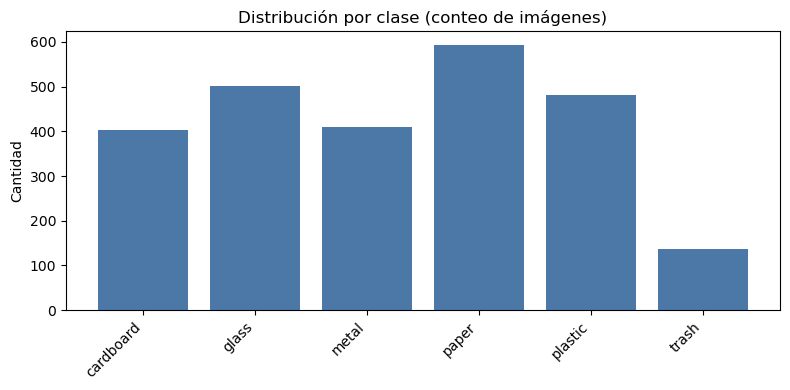

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

# Ubicación del dataset
root_dir = os.getcwd()
dataset_dir = os.path.join(root_dir, "dataset-resized")

if not os.path.isdir(dataset_dir):
    raise FileNotFoundError(f"No se encontró 'dataset-resized' en: {dataset_dir}")

image_exts = (".jpg",)
class_to_count = {}

# Contar imágenes por clase (una subcarpeta por clase)
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    num_images = sum(
        1 for f in os.listdir(class_path)
        if f.lower().endswith(image_exts)
    )
    class_to_count[class_name] = num_images

# Mostrar conteos
total_images = sum(class_to_count.values())
print("Total de imágenes:", total_images)
for cls, cnt in class_to_count.items():
    print(f"{cls}: {cnt}")

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(list(class_to_count.keys()), list(class_to_count.values()), color="#4C78A8")
plt.title("Distribución por clase (conteo de imágenes)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
